In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
from matplotlib.colors import LogNorm

import timeit
import Double_Null_utils as dnu
from scipy import optimize
import tables
import h5py



#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

/home/brandon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
uscal=1
vscal=2

In [3]:
rnputil=np.load('rnputil.npy')
wHD=rnputil[8]
print(wHD)

if wHD==True or wHD==1.0:
    urange=np.load('urange.npy')[::uscal]
    vrange=np.load('vrange.npy')[::vscal]
if wHD==False or wHD==0.0 or wHD==None:
    urange=np.load('urange.npy')
    vrange=np.load('vrange.npy')


1.0


In [4]:
if wHD==True or wHD==1.0:
    with h5py.File('rnp.h5','r') as f:
        r_group_key = list(f.keys())[0]
        rnpi=f[r_group_key]
        rnp = np.asarray(rnpi[::uscal,::vscal])
    with h5py.File('signp.h5','r') as f:
        sig_group_key = list(f.keys())[0]
        signpi=f[sig_group_key]
        signp = np.asarray(signpi[::uscal,::vscal])
    with h5py.File('phinp.h5','r') as f:
        phi_group_key = list(f.keys())[0]
        phinpi=f[phi_group_key]
        phinp = np.asarray(phinpi[::uscal,::vscal])
    with h5py.File('massnp.h5','r') as f:
        mass_group_key = list(f.keys())[0]
        massnpi=f[mass_group_key]
        massnp = np.asarray(massnpi[::uscal,::vscal])
    
    print(str(rnp.nbytes)+" bytes")
    print("Hd5 files used")

if wHD==False or wHD==0.0 or wHD==None:
    rnp=np.load('rnp.npy')
    signp=np.load('sig.npy')
    phinp=np.load('phi.npy')
    massnp=np.load('mass.npy')
    print("Numpy arrays used")

2144000 bytes
Hd5 files used


In [5]:
print(rnputil)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)


dv0=vrange[1]-vrange[0]

def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M0,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(144935)
if Q>0.0:
    predtime=numpoints/(259000)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

[5.38000000e+05 2.69000000e+02 2.00000000e+03 2.50000000e+00
 1.33333333e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00]
268000 points
Runtime: about 0.03 minutes


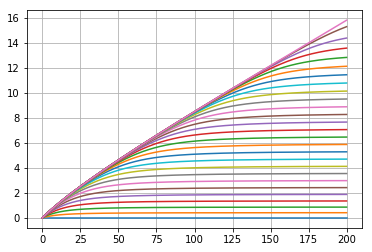

In [16]:
for line in signp[::10]:
    plt.plot(vrange,line)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
#plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
#plt.ylim(.9975,1.0025)    
plt.grid()
plt.show()



In [ ]:
for line in massnp[::10]:
    plt.plot(vrange,line)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
#plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
plt.ylim(.9975,1.0025)    
plt.grid()
plt.show() 

In [7]:
massdiffnp=abs(massnp[:,:]-M0)
print(massdiffnp)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.14214028e-05 4.38665910e-05 ... 5.20219749e-04
  5.20242606e-04 5.20265403e-04]
 [0.00000000e+00 2.14497419e-05 2.24478725e-05 ... 1.83195461e-04
  1.83202677e-04 1.83209866e-04]
 ...
 [0.00000000e+00 1.79857422e-06 1.62472869e-06 ... 1.12575963e-03
  1.12778406e-03 1.12973965e-03]
 [0.00000000e+00 1.79856637e-06 1.62473200e-06 ... 1.11813243e-03
  1.11962499e-03 1.12100642e-03]
 [0.00000000e+00 1.79857142e-06 1.62473990e-06 ... 1.10996486e-03
  1.11083386e-03 1.11153723e-03]]


/home/brandon/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


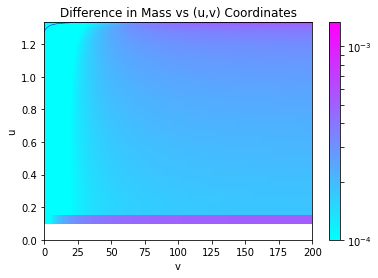

In [8]:
plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(massdiffnp),cmap=plt.cm.cool,norm=LogNorm(vmin=0.0001, vmax=np.nanmax(massdiffnp)))
plot5=plt.contour(vrange,urange,np.ma.masked_invalid(rnp), [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,np.ma.masked_invalid(rnp), [rminus],linewidths=0.5,colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.xlabel('v')
plt.ylabel('u')
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(1.5,2.5)
#plt.xlim(100,200)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Difference in Mass vs (u,v) Coordinates')
#plt.savefig('Mass-Error.png',dpi=300)
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.14214028e-05 4.38665910e-05 ... 5.20219749e-04
  5.20242606e-04 5.20265403e-04]
 [0.00000000e+00 2.14497419e-05 2.24478725e-05 ... 1.83195461e-04
  1.83202677e-04 1.83209866e-04]
 ...
 [0.00000000e+00 1.79857422e-06 1.62472869e-06 ... 1.12575963e-03
  1.12778406e-03 1.12973965e-03]
 [0.00000000e+00 1.79856637e-06 1.62473200e-06 ... 1.11813243e-03
  1.11962499e-03 1.12100642e-03]
 [0.00000000e+00 1.79857142e-06 1.62473990e-06 ... 1.10996486e-03
  1.11083386e-03 1.11153723e-03]]
0.0013301811739991898
0.0003685372750847285


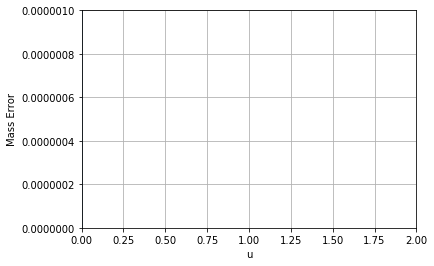

279002.65513

In [9]:
print(massdiffnp)
print(np.nanmax(massdiffnp))
print(np.nanmean(massdiffnp))
#print(massdiffnp[-10])

plt.plot(urange,massdiffnp[:,-1])
#plt.yscale('log')
plt.ylabel('Mass Error')
plt.xlabel('u')
plt.xlim(0,2)
plt.ylim(0,0.000001)
plt.grid()
plt.show()

1897154954.72
13851032.0928
54530507.1436
13851032.0928
#Tol=2, Nul=2000, N=10 9.128 min
13730096.5359
#Tol=.2, Nul=200, 5.671 min
13851032.0928
#Tol=1, Nul=200, 1.122 min
336154711.505
256500.649449
#Tol=1, Nul=2000, 11.938 min
4538541.30462
3379.12875389
#Tol=1, Nul=200, N=100, 11.029 min - full
627615304.428
279002.65513

In [10]:
sig2np=np.zeros((Nu,Nv))
sigdiffnp=np.zeros((Nu,Nv))

sig2np[:,:]=np.log(1-2*M0/rnp[:,:]+Q**2/rnp[:,:]**2-Lambda*rnp[:,:]**2/3)

sigdiffnp[:,:]=abs(signp[:,:]-sig2np[:,:])

/home/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


/home/brandon/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


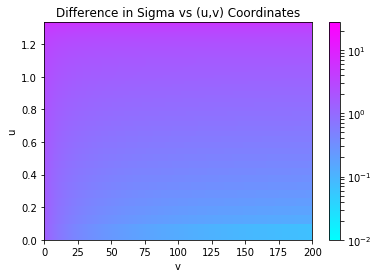

In [11]:
plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(sigdiffnp),cmap=plt.cm.cool,norm=LogNorm(vmin=0.01, vmax=np.nanmax(sigdiffnp)))
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Difference in Sigma vs (u,v) Coordinates')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

In [12]:
print(sigdiffnp)
print(np.nanmax(sigdiffnp))

[[ 1.60943791  1.56808835  1.52919438 ...  0.07123828  0.07117065
   0.07110315]
 [ 1.67228582  1.63093611  1.59204201 ...  0.13409851  0.13403088
   0.13396338]
 [ 1.709846    1.66849626  1.62960215 ...  0.17166136  0.17159374
   0.17152624]
 ...
 [11.70259066 11.6472688  11.59710153 ...         nan         nan
          nan]
 [11.70264979 11.64732712 11.59715919 ...         nan         nan
          nan]
 [11.70270535 11.6473819  11.59721335 ...         nan         nan
          nan]]
27.34309185897263


In [13]:
def ce1checker(rnp,signp,i):
    checklist=np.empty((Nv-2))*np.nan
    for j in range(0,Nv-2):
        checklist[j]=1/dv0**2*(rnp[i][j+2]-2*rnp[i][j+1]+rnp[i][j]-(rnp[i][j+1]-rnp[i][j])*(signp[i][j+1]-signp[i][j]))
    return checklist
def ce2checker(rnp,signp,j):
    checklist=np.empty((Nu-2))*np.nan
    for i in range(0,Nu-2):
        checklist[i]=1/((urange[i+1]-urange[i])*(urange[i+2]-urange[i+1]))*((rnp[i+2][j]-2*rnp[i+1][j]+rnp[i][j])-(rnp[i+1][j]-rnp[i][j])*(signp[i+1][j]-signp[i][j]))
    return checklist


print(ce1checker(rnp,signp,3500))
print(np.nanmax(np.abs(ce1checker(rnp,signp,3500))))
print(ce2checker(rnp,signp,0))
print(np.nanmax(np.abs(ce2checker(rnp,signp,0))))

IndexError: index 3500 is out of bounds for axis 0 with size 268

In [ ]:
u5=1000
v5=1200

du0=urange[u5+1]-urange[u5]
dv0=vrange[v5+1]-vrange[v5]
print(du0)
print(dv0)

rnpnew=np.array([[rnp[u5][v5],rnp[u5][v5+1]],[rnp[u5+1][v5],2]])
signpnew=np.array([[signp[u5][v5],signp[u5][v5+1]],[signp[u5+1][v5],2]])
phinpnew=np.array([[0,0],[0,0]])

print(rnpnew)
print(signpnew)

print(dnu.x4giveralt(0,0,du0,dv0,rnpnew,phinpnew,signpnew,1.0,.95,0.0,np.float64))
print(massnp[u5][v5])

In [ ]:
print(rnp[1][0])

In [ ]:
#u=1,v=1
M2=1.0000231
M3=1.0000002 
M4=1.0000119 #increase v res
M5=1.0000010 #increase u res
###############
#u=10,v=10
M2=1.0000229
M3=1.0000002
M4=1.0000139
M5=1.0000098